In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import sklearn as skl
import sklearn.linear_model as skl
import sklearn.model_selection as skl_ms
import sklearn.metrics as skl_mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/M_Laptop_Final_Data.csv", encoding='latin-1')
df

,Name,type,RAM,CPU,GPU,ScreenSize,Resoloution,Storage,OS,price
0,HP,Notebook,16 GB,Intel Core i7 1355U,Intel Iris Xe,13.5 Inch,1920x1280,512GB SSD,Windows,76700
1,HP,Notebook,8 GB,Intel Core i5 1355U,Intel Iris Xe,14 Inch,1920x1080,512GB SSD,Windows,41990
2,HP,Notebook,8 GB,Intel Core i5 1235U,NVIDIA MX570,15.6 Inch,1920x1080,512GB SSD,Dos,34700
3,HP,Notebook,8 GB,Intel Core i5 1342,NVIDIA RTX 3050,15.6 Inch,1920x1080,512GB SSD,Dos,37880
4,HP,Notebook,4 GB,Intel Core i3 1215U,Intel UHD,15.6 Inch,1920x1080,256GB SSD,Windows,21493
...,...,...,...,...,...,...,...,...,...,...
400,Lenovo,Notebook,8 GB,AMD RYZEN 5 5500U,AMD Radeon,15.6 Inch,1920x1080,1TB HDD,Dos,20999
401,Lenovo,Gaming,16 GB,Intel Core i7 1137,NVIDIA RTX2050,15.6 Inch,1920x1080,1TB HDD,Dos,38999
402,Lenovo,Notebook,8 GB,AMD RYZEN 7 5500U,AMD Radeon,15.6 Inch,1920x1080,1TB HDD,Dos,25999
403,HP,Notebook,8 GB,AMD RYZEN 3 5500U,AMD Radeon,15.6 Inch,1920x1080,512GB SSD,Dos,18999


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         405 non-null    object
 1   type         405 non-null    object
 2   RAM          405 non-null    object
 3   CPU          405 non-null    object
 4   GPU          405 non-null    object
 5   ScreenSize   405 non-null    object
 6   Resoloution  405 non-null    object
 7   Storage      405 non-null    object
 8   OS           405 non-null    object
 9   price        405 non-null    object
dtypes: object(10)
memory usage: 31.8+ KB


In [ ]:
df.describe()

,Name,type,RAM,CPU,GPU,ScreenSize,Resoloution,Storage,OS,price
count,405,405,405,405,405,405,405,405,405,405
unique,11,4,13,149,51,13,16,11,3,322
top,Lenovo,Notebook,8 GB,Intel Core i7 1255U,Intel UHD,15.6 Inch,1920x1080,512GB SSD,Windows,29999
freq,105,333,148,34,106,300,292,272,203,5


In [ ]:
#df.price.astype(float).astype(int)
df['price'] = df['price'].astype(float).astype(int)


In [ ]:
df

,Name,type,RAM,CPU,GPU,ScreenSize,Resoloution,Storage,OS,price
0,HP,Notebook,16 GB,Intel Core i7 1355U,Intel Iris Xe,13.5 Inch,1920x1280,512GB SSD,Windows,76700
1,HP,Notebook,8 GB,Intel Core i5 1355U,Intel Iris Xe,14 Inch,1920x1080,512GB SSD,Windows,41990
2,HP,Notebook,8 GB,Intel Core i5 1235U,NVIDIA MX570,15.6 Inch,1920x1080,512GB SSD,Dos,34700
3,HP,Notebook,8 GB,Intel Core i5 1342,NVIDIA RTX 3050,15.6 Inch,1920x1080,512GB SSD,Dos,37880
4,HP,Notebook,4 GB,Intel Core i3 1215U,Intel UHD,15.6 Inch,1920x1080,256GB SSD,Windows,21493
...,...,...,...,...,...,...,...,...,...,...
400,Lenovo,Notebook,8 GB,AMD RYZEN 5 5500U,AMD Radeon,15.6 Inch,1920x1080,1TB HDD,Dos,20999
401,Lenovo,Gaming,16 GB,Intel Core i7 1137,NVIDIA RTX2050,15.6 Inch,1920x1080,1TB HDD,Dos,38999
402,Lenovo,Notebook,8 GB,AMD RYZEN 7 5500U,AMD Radeon,15.6 Inch,1920x1080,1TB HDD,Dos,25999
403,HP,Notebook,8 GB,AMD RYZEN 3 5500U,AMD Radeon,15.6 Inch,1920x1080,512GB SSD,Dos,18999


In [ ]:
df["ScreenSize"] = df["ScreenSize"].str.replace("inch", "", case=False)
df["ScreenSize"]

,ScreenSize
0,13.5
1,14
2,15.6
3,15.6
4,15.6
...,...
400,15.6
401,15.6
402,15.6
403,15.6


In [ ]:
df['ScreenSize'] = df['ScreenSize'].astype(float)

In [ ]:
df.rename(columns={'Resoloution': 'Resolution'}, inplace=True)
df["Resolution"].value_counts()

,count
Resolution,
1920x1080,292
1920x1200,44
2560x1600,16
1920X1080,14
2880x1800,14
2560x1664,10
2880x1620,3
2881x1620,2
2882x1620,2


In [ ]:
df['Resolution'] = df.Resolution.str.split(" ").apply(lambda x: x[-1])
df['ResolutionWidth'] = df.Resolution.str.lower().str.split("x").apply(lambda x: x[0] if len(x) > 0 else None)
df['ResolutionHeight'] = df.Resolution.str.lower().str.split("x").apply(lambda x: x[1] if len(x) > 1 else None)

In [ ]:
df

,Name,type,RAM,CPU,GPU,ScreenSize,Resolution,Storage,OS,price,ResolutionWidth,ResolutionHeight
0,HP,Notebook,16 GB,Intel Core i7 1355U,Intel Iris Xe,13.5,1920x1280,512GB SSD,Windows,76700,1920,1280
1,HP,Notebook,8 GB,Intel Core i5 1355U,Intel Iris Xe,14.0,1920x1080,512GB SSD,Windows,41990,1920,1080
2,HP,Notebook,8 GB,Intel Core i5 1235U,NVIDIA MX570,15.6,1920x1080,512GB SSD,Dos,34700,1920,1080
3,HP,Notebook,8 GB,Intel Core i5 1342,NVIDIA RTX 3050,15.6,1920x1080,512GB SSD,Dos,37880,1920,1080
4,HP,Notebook,4 GB,Intel Core i3 1215U,Intel UHD,15.6,1920x1080,256GB SSD,Windows,21493,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
400,Lenovo,Notebook,8 GB,AMD RYZEN 5 5500U,AMD Radeon,15.6,1920x1080,1TB HDD,Dos,20999,1920,1080
401,Lenovo,Gaming,16 GB,Intel Core i7 1137,NVIDIA RTX2050,15.6,1920x1080,1TB HDD,Dos,38999,1920,1080
402,Lenovo,Notebook,8 GB,AMD RYZEN 7 5500U,AMD Radeon,15.6,1920x1080,1TB HDD,Dos,25999,1920,1080
403,HP,Notebook,8 GB,AMD RYZEN 3 5500U,AMD Radeon,15.6,1920x1080,512GB SSD,Dos,18999,1920,1080


In [ ]:
df = df.drop("Resolution", axis=1)

In [ ]:
df['CPU Brand']=df['CPU'].str.split(" ").apply(lambda x: x[0])
df['CPU Frequency']=df['CPU'].str.split(" ").apply(lambda x: x[-1])

In [ ]:
df["CPU Frequency"]=df["CPU Frequency"].str[:4]
df["CPU Frequency"]

,CPU Frequency
0,1355
1,1355
2,1235
3,1342
4,1215
...,...
400,5500
401,1137
402,5500
403,5500


In [ ]:
df["RAM"] = df["RAM"].str[:-2]
df["RAM"]

,RAM
0,16
1,8
2,8
3,8
4,4
...,...
400,8
401,16
402,8
403,8


In [ ]:
import re

def extract_frequency(cpu_name):

    try:
        # Check if the name ends with "GHz" and extract the numeric part before it.
        if cpu_name.endswith("GHz"):
            return float(cpu_name[:-3])
        # If not "GHz", extract the numeric part using regex.
        else:
            match = re.search(r'\d+', cpu_name)  # Search for one or more digits.
            if match:
                return float(match.group(0))  # Convert the matched digits to float.
            else:
                return float('nan')  # Return NaN if no numeric part is found.
    except (ValueError, TypeError):
        return float('nan')  # Return NaN for any unexpected errors.

# Apply the function to extract frequency from the "CPU" column.
df['CPU Frequency'] = df['CPU'].apply(extract_frequency)
df['CPU Frequency'] = df['CPU Frequency'].astype(float)  # Convert to float type.

In [ ]:
df = df.drop("CPU", axis=1)

In [ ]:
df["ResolutionWidth"]

,ResolutionWidth
0,1920
1,1920
2,1920
3,1920
4,1920
...,...
400,1920
401,1920
402,1920
403,1920


In [ ]:
df["RAM"] = df["RAM"].astype(int)
df["ResolutionWidth"]= df["ResolutionWidth"].astype(int)
df["ResolutionHeight"]= df["ResolutionHeight"].astype(int)

In [ ]:
df["Memory Amount"] = df['Storage'].str.split(" ", n=0, expand=True).get(0)
df["Memory Type"] = df['Storage'].str.split(" ", n=1, expand=True).get(1)

In [ ]:
df["Memory Amount"]


,Memory Amount
0,512GB
1,512GB
2,512GB
3,512GB
4,256GB
...,...
400,1TB
401,1TB
402,1TB
403,512GB


In [ ]:
def turn_memory_into_MB(value):
  if "GB" in value:
    return float(value[:value.find("GB")]) * 1000
  elif "TB" in value:
    return float(value[:value.find("TB")]) * 1000000

In [ ]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [ ]:
df = df.drop("Storage", axis=1)

In [ ]:
df

,Name,type,RAM,GPU,ScreenSize,OS,price,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Frequency,Memory Amount,Memory Type
0,HP,Notebook,16,Intel Iris Xe,13.5,Windows,76700,1920,1280,Intel,7.0,512000.0,SSD
1,HP,Notebook,8,Intel Iris Xe,14.0,Windows,41990,1920,1080,Intel,5.0,512000.0,SSD
2,HP,Notebook,8,NVIDIA MX570,15.6,Dos,34700,1920,1080,Intel,5.0,512000.0,SSD
3,HP,Notebook,8,NVIDIA RTX 3050,15.6,Dos,37880,1920,1080,Intel,5.0,512000.0,SSD
4,HP,Notebook,4,Intel UHD,15.6,Windows,21493,1920,1080,Intel,3.0,256000.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Lenovo,Notebook,8,AMD Radeon,15.6,Dos,20999,1920,1080,AMD,5.0,1000000.0,HDD
401,Lenovo,Gaming,16,NVIDIA RTX2050,15.6,Dos,38999,1920,1080,Intel,7.0,1000000.0,HDD
402,Lenovo,Notebook,8,AMD Radeon,15.6,Dos,25999,1920,1080,AMD,7.0,1000000.0,HDD
403,HP,Notebook,8,AMD Radeon,15.6,Dos,18999,1920,1080,AMD,3.0,512000.0,SSD


In [ ]:
df["GPU Brand"] = df.GPU.str.split(" ").apply(lambda x: x[0])

In [ ]:
df = df.drop("GPU", axis=1)
df

,Name,type,RAM,ScreenSize,OS,price,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Frequency,Memory Amount,Memory Type,GPU Brand
0,HP,Notebook,16,13.5,Windows,76700,1920,1280,Intel,7.0,512000.0,SSD,Intel
1,HP,Notebook,8,14.0,Windows,41990,1920,1080,Intel,5.0,512000.0,SSD,Intel
2,HP,Notebook,8,15.6,Dos,34700,1920,1080,Intel,5.0,512000.0,SSD,NVIDIA
3,HP,Notebook,8,15.6,Dos,37880,1920,1080,Intel,5.0,512000.0,SSD,NVIDIA
4,HP,Notebook,4,15.6,Windows,21493,1920,1080,Intel,3.0,256000.0,SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Lenovo,Notebook,8,15.6,Dos,20999,1920,1080,AMD,5.0,1000000.0,HDD,AMD
401,Lenovo,Gaming,16,15.6,Dos,38999,1920,1080,Intel,7.0,1000000.0,HDD,NVIDIA
402,Lenovo,Notebook,8,15.6,Dos,25999,1920,1080,AMD,7.0,1000000.0,HDD,AMD
403,HP,Notebook,8,15.6,Dos,18999,1920,1080,AMD,3.0,512000.0,SSD,AMD


In [ ]:
cpu_categories = pd.get_dummies(df['CPU Brand'], dtype=int)
cpu_categories.coulmns = [col + "_CPU" for col in cpu_categories]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

<ipython-input-562-b9c16bf204dd>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cpu_categories.coulmns = [col + "_CPU" for col in cpu_categories]


In [ ]:
gpu_categories = pd.get_dummies(df['GPU Brand'], dtype=int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]
df = df.join(gpu_categories, lsuffix='_caller', rsuffix='_other')
df = df.drop("GPU Brand", axis=1)

In [ ]:
df

,Name,type,RAM,ScreenSize,OS,price,ResolutionWidth,ResolutionHeight,CPU Frequency,Memory Amount,...,14_GPU,18_GPU,30_GPU,7_GPU,8_GPU,AMD_GPU,Intel_GPU,NVIDIA_GPU,NVIDIARTX_GPU,Qualcomm_GPU
0,HP,Notebook,16,13.5,Windows,76700,1920,1280,7.0,512000.0,...,0,0,0,0,0,0,1,0,0,0
1,HP,Notebook,8,14.0,Windows,41990,1920,1080,5.0,512000.0,...,0,0,0,0,0,0,1,0,0,0
2,HP,Notebook,8,15.6,Dos,34700,1920,1080,5.0,512000.0,...,0,0,0,0,0,0,0,1,0,0
3,HP,Notebook,8,15.6,Dos,37880,1920,1080,5.0,512000.0,...,0,0,0,0,0,0,0,1,0,0
4,HP,Notebook,4,15.6,Windows,21493,1920,1080,3.0,256000.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Lenovo,Notebook,8,15.6,Dos,20999,1920,1080,5.0,1000000.0,...,0,0,0,0,0,1,0,0,0,0
401,Lenovo,Gaming,16,15.6,Dos,38999,1920,1080,7.0,1000000.0,...,0,0,0,0,0,0,0,1,0,0
402,Lenovo,Notebook,8,15.6,Dos,25999,1920,1080,7.0,1000000.0,...,0,0,0,0,0,1,0,0,0,0
403,HP,Notebook,8,15.6,Dos,18999,1920,1080,3.0,512000.0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['Name','type','OS','Memory Type'],prefix='', dtype=int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RAM               405 non-null    int64  
 1   ScreenSize        405 non-null    float64
 2   price             405 non-null    int64  
 3   ResolutionWidth   405 non-null    int64  
 4   ResolutionHeight  405 non-null    int64  
 5   CPU Frequency     403 non-null    float64
 6   Memory Amount     405 non-null    float64
 7   AMD               405 non-null    int64  
 8   Core              405 non-null    int64  
 9   Intel             405 non-null    int64  
 10  IntelCore         405 non-null    int64  
 11  M1                405 non-null    int64  
 12  M2                405 non-null    int64  
 13  M3                405 non-null    int64  
 14  Snapdragon        405 non-null    int64  
 15  intel             405 non-null    int64  
 16  10_GPU            405 non-null    int64  
 1

# **Correlation Matrix:**

<Axes: >

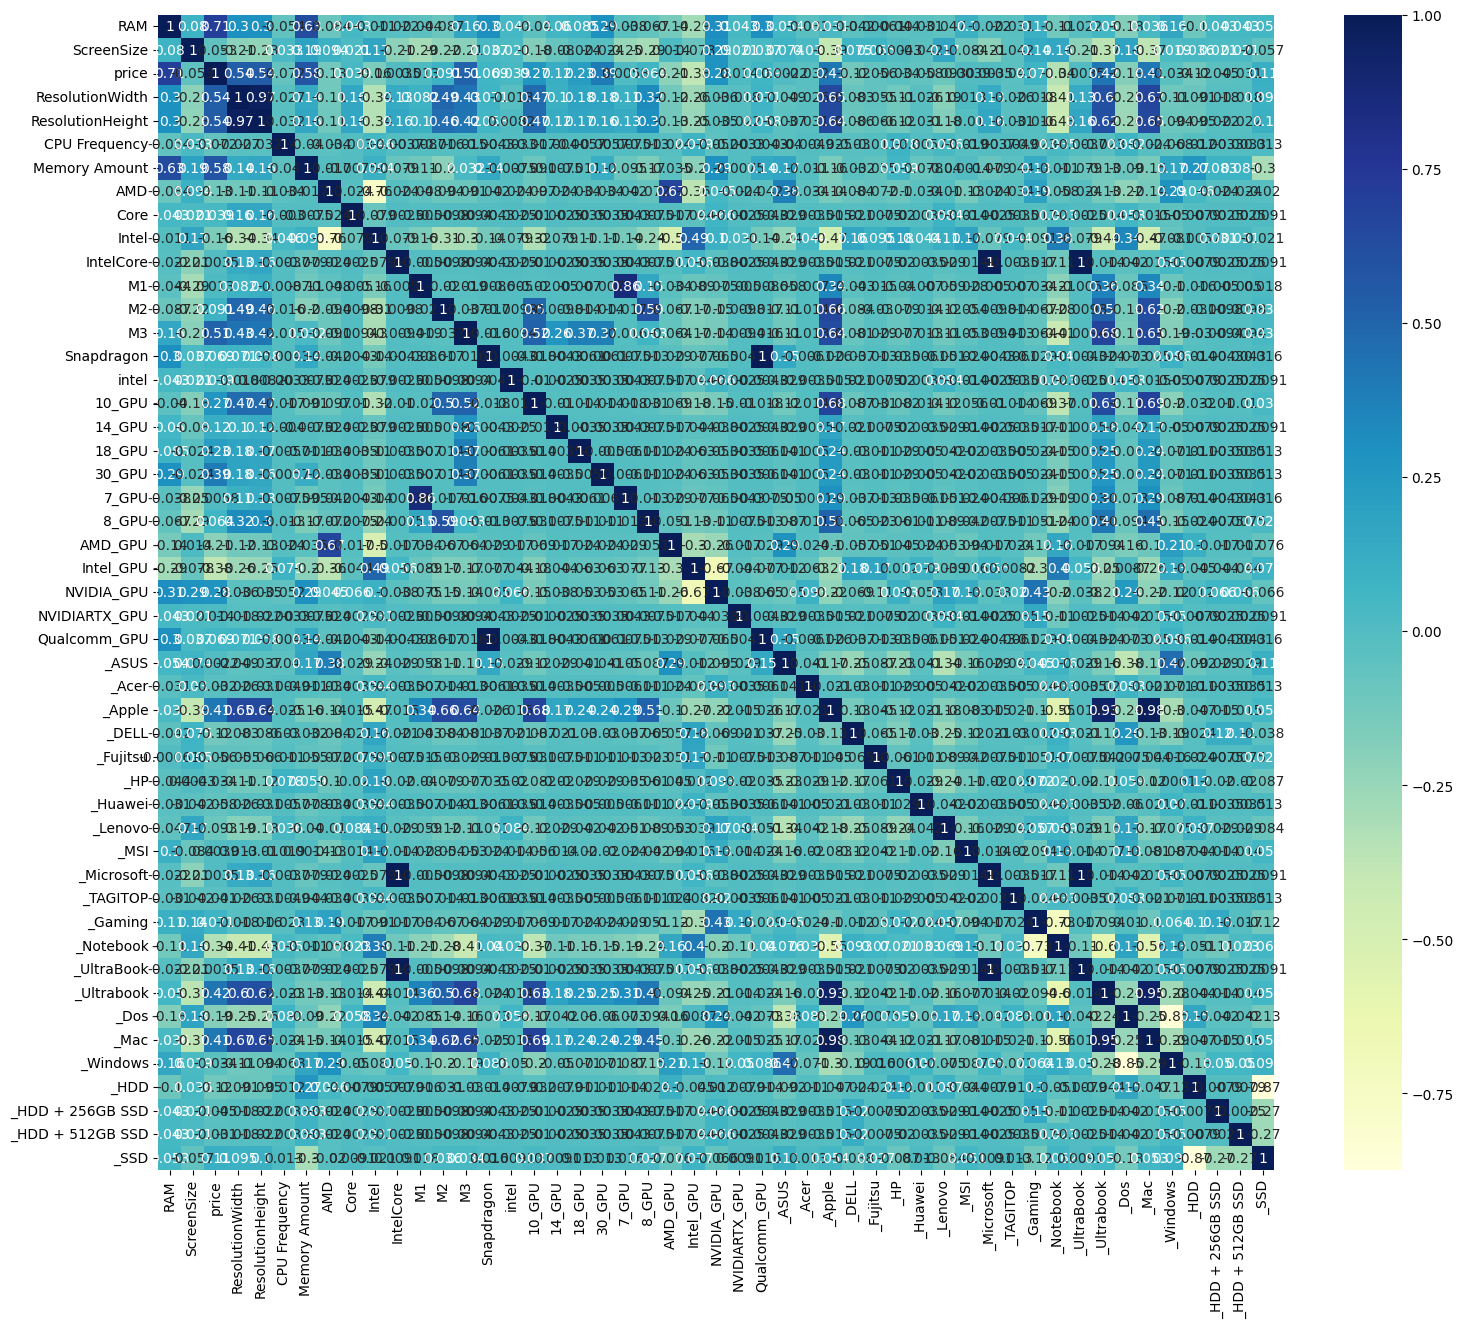

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
target_correlations = df.corr()['price'].apply(abs).sort_values()

In [ ]:
target_correlations

,price
_ASUS,0.002195
_UltraBook,0.003533
IntelCore,0.003533
_Microsoft,0.003533
_MSI,0.003876
7_GPU,0.005769
M1,0.012685
NVIDIARTX_GPU,0.013645
_HDD + 512GB SSD,0.031014
_Acer,0.031575


In [ ]:
selected_features = target_correlations[-23:].index

In [ ]:
selected_features = list(selected_features)

In [ ]:
selected_features

['_SSD',
 '14_GPU',
 '_DELL',
 '_HDD',
 'AMD',
 'Intel',
 '_Dos',
 'AMD_GPU',
 '18_GPU',
 '10_GPU',
 'NVIDIA_GPU',
 '_Notebook',
 'Intel_GPU',
 '30_GPU',
 '_Apple',
 '_Mac',
 '_Ultrabook',
 'M3',
 'ResolutionWidth',
 'ResolutionHeight',
 'Memory Amount',
 'RAM',
 'price']

In [ ]:
limited_df = df[selected_features]

In [ ]:
limited_df

,_SSD,14_GPU,_DELL,_HDD,AMD,Intel,_Dos,AMD_GPU,18_GPU,10_GPU,...,30_GPU,_Apple,_Mac,_Ultrabook,M3,ResolutionWidth,ResolutionHeight,Memory Amount,RAM,price
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1920,1280,512000.0,16,76700
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1920,1080,512000.0,8,41990
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1920,1080,512000.0,8,34700
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1920,1080,512000.0,8,37880
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1920,1080,256000.0,4,21493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,1920,1080,1000000.0,8,20999
401,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1920,1080,1000000.0,16,38999
402,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,1920,1080,1000000.0,8,25999
403,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1920,1080,512000.0,8,18999


<Axes: >

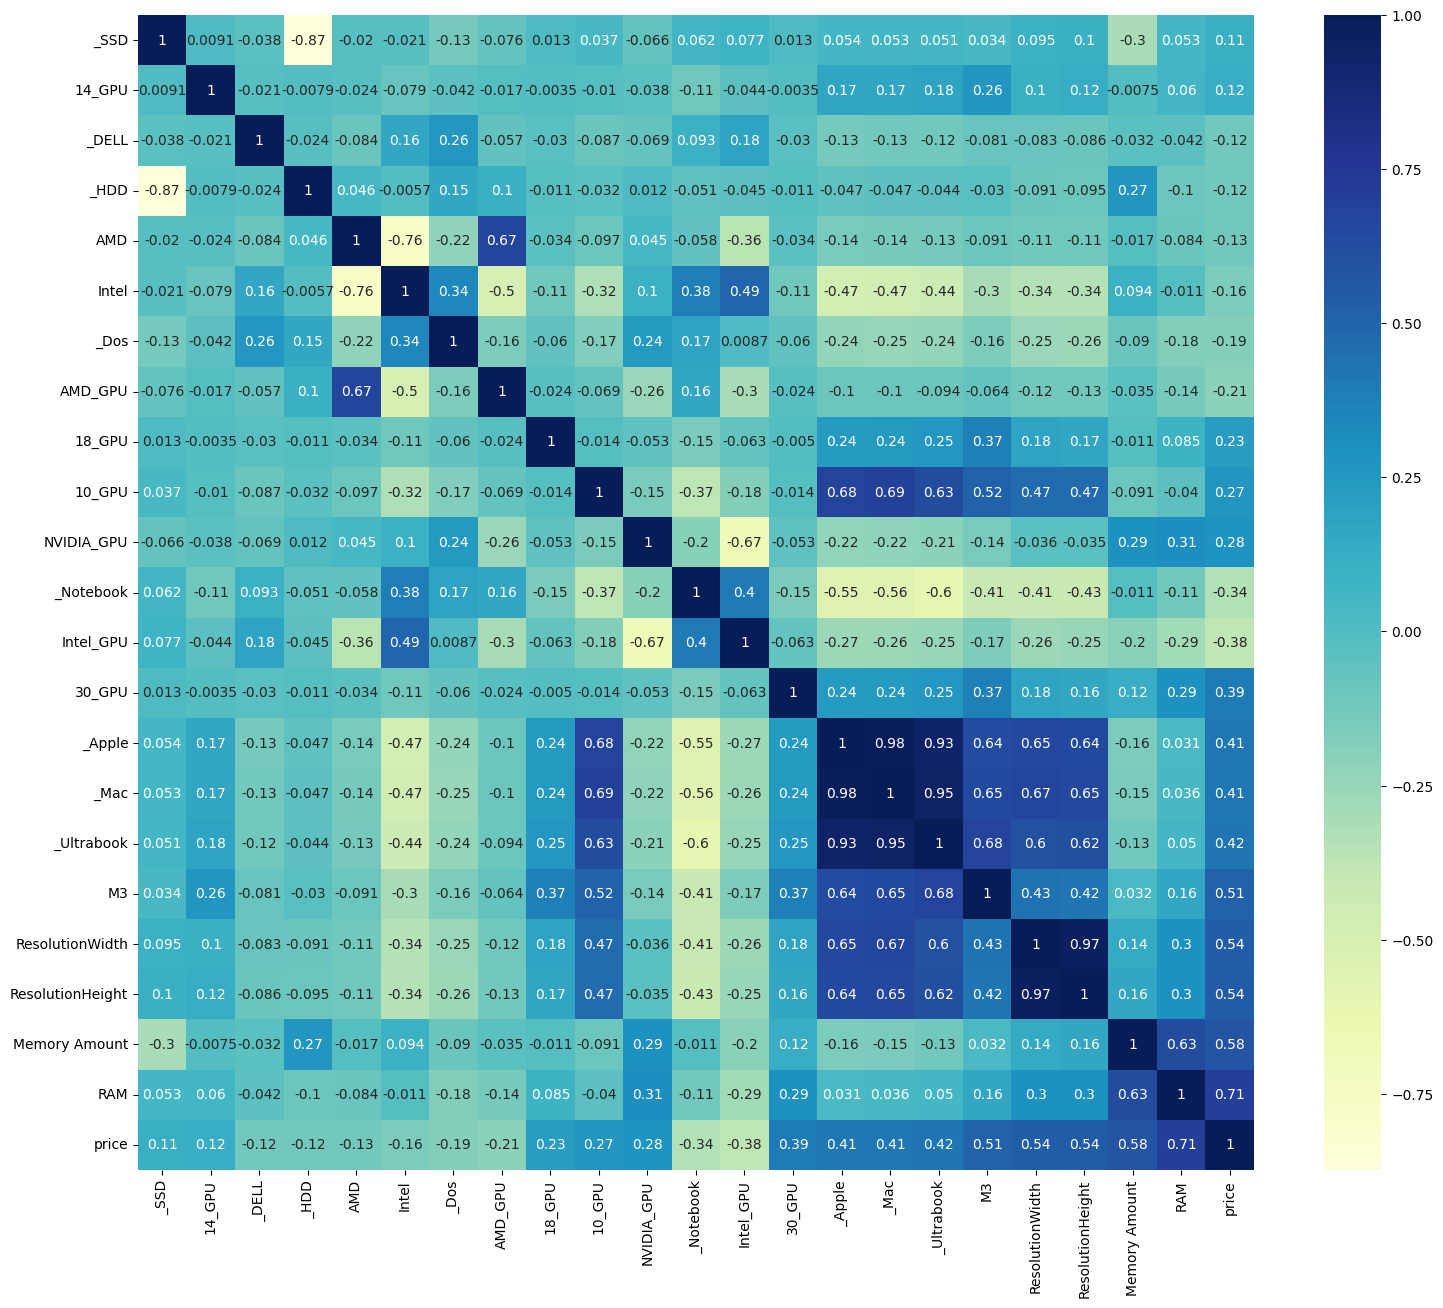

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

# **Machine learning Models:**

**1. RandomForestRegressor:**

In [ ]:
x, y = limited_df.drop("price", axis=1), limited_df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5023)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

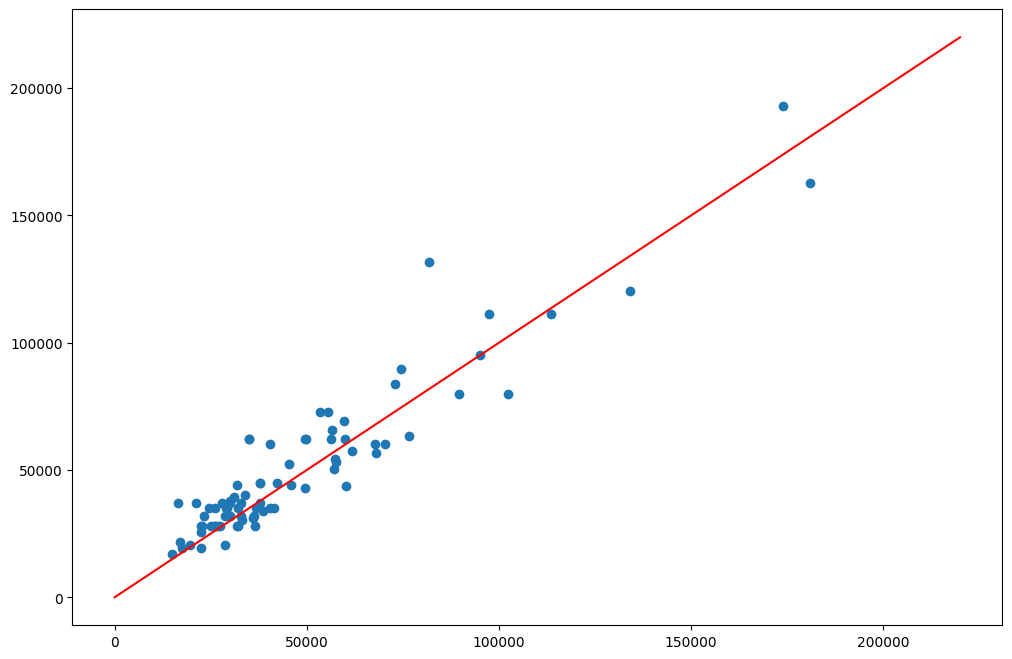

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.plot(range(0, 220000), range(0, 220000), color="red")

# **Model's Test:**

In [ ]:
x_new_scaled = scaler.transform([x_test.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
gbr.predict(x_new_scaled)

array([35218.22263265])

In [ ]:
y_test.iloc[0]

41594

In [ ]:
from sklearn.ensemble import

gbr = GradientBoostingRegressor()
gbr.fit(x_train_scaled, y_train)
gbr.score(x_test_scaled, y_test)

0.8843615722019184

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_scaled, y_train)
y_pred = gbr.predict(x_test_scaled)
score = gbr.score(x_test_scaled, y_test)

print("R-squared score:", score)

R-squared score: 0.885055193319112
